In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Reading a  pre-processed data using python's pandas library
import pandas as pd
data=pd.read_csv('/gdrive/My Drive/SMS spam detection/Complete_processed_spam_data.csv')
data.head(10)

,Unnamed: 0,SMS,Result
0,0,go jurong point crazy available bugis n great ...,0
1,1,ok lar joking wif u oni,0
2,2,free entry wkly comp win fa cup final tkts st ...,1
3,3,u dun say early hor u c already say,0
4,4,nah think go usf life around though,0
5,5,freemsg hey darling week word back like fun st...,1
6,6,even brother like speak treat like aid patent,0
7,7,per request melle melle oru minnaminunginte nu...,0
8,8,winner valued network customer selected receiv...,1
9,9,mobile month u r entitled update latest colour...,1


In [ ]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
data.head(10)

,SMS,Result
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think go usf life around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aid patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile month u r entitled update latest colour...,1


Splitting the data into train dataset and test dataset 

In [ ]:
x=data['SMS']
y=data['Result']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#Printing the shapes of train and test dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


## **Bag of Words**
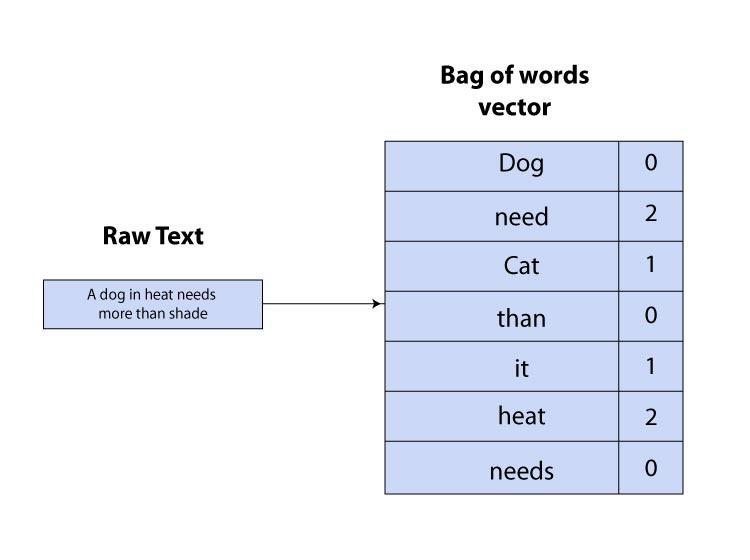


*   Bag of Words (BOW) is a method to extract features from text documents.

*  It creates a vocabulary of all the unique words occurring in all the documents in the training set.





*   used in methods of document classification,sentiment analysis where the (frequency of) occurrence of each word is used as a feature for training a classifier.


In [ ]:
#Converting words to vectors using Bagofwords
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_bow=cv.fit_transform(x_train.values.astype('U')).toarray()

In [ ]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Building a Multinomial Naive Bayes Model
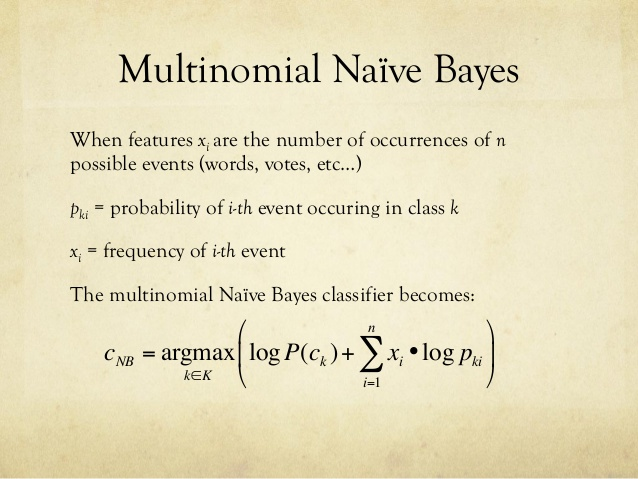
1. What is Multinomial Naive Bayes?<br>
Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. 
2. Whereas simple naive Bayes would model a document as the presence and absence of particular words.
3. Multinomial naive Bayes explicitly models the word counts and adjusts the underlying calculations to deal within.

Why Multinomial Naive Bayes?
1. We already know it is very well suited for Text data.
2. Because it uses frequency method for model training.
3. That's why I have chosen Multinomial Naive Bayes for building a model.

In [ ]:
#Model Development
#1.Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(x_train_bow,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#prediction for multinomial naive bayes using test dataset.
x_test_bow=cv.transform(x_test).toarray()
prediction_mul_nb=mul_nb.predict(x_test_bow)

In [ ]:
prediction_mul_nb

array([0, 0, 0, ..., 0, 0, 0])

## **Classification evaluation metrics**

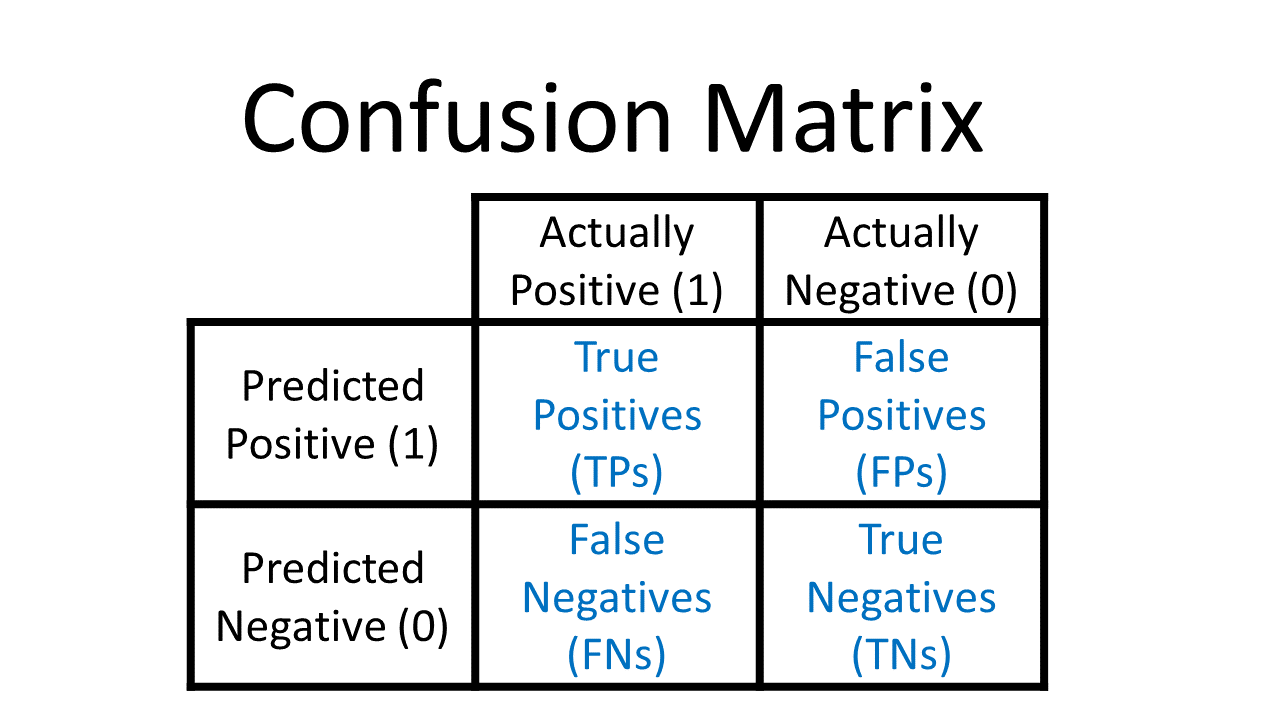
1.   Confusion matrix
2.   Classification Report
3.   Accuracy Score

In [ ]:
#Evaluation metrics for Multinomial Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,prediction_mul_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,prediction_mul_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,prediction_mul_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[945  12]
 [ 17 141]]
The accuracy score for the model is :  0.9739910313901345
The classification report for the model :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       957
           1       0.92      0.89      0.91       158

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.97      0.97      0.97      1115



## Building a RandomForest Classifier

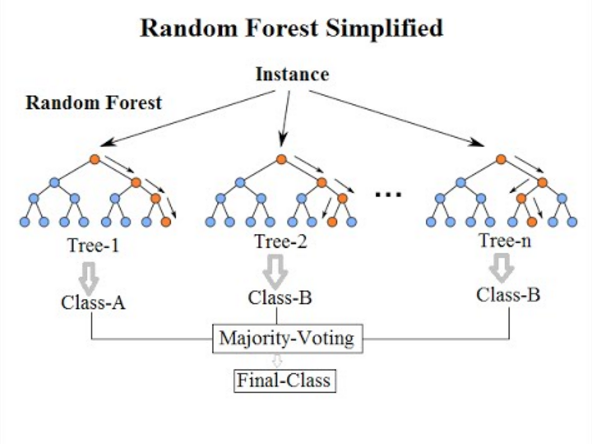
1.   A random forest is one of the ensemble techniques and meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

2. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Why I have chosen RandomForest classifier?


1.   The model runs on multiple decision trees and select the output based on voting classifier(for classification).
2.  So it gives better accuracy and prevents overfitting.
3.  The main important thing is it produces low bias and low variance.


In [ ]:
#2.Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,criterion='gini')
rf.fit(x_train_bow,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction for randomforest
rf_prediction=rf.predict(x_test_bow)
rf_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,rf_prediction)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,rf_prediction)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,rf_prediction)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[957   0]
 [ 36 122]]
The accuracy score for the model is :  0.967713004484305
The classification report for the model :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.77      0.87       158

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Building a Naive Bayes Model

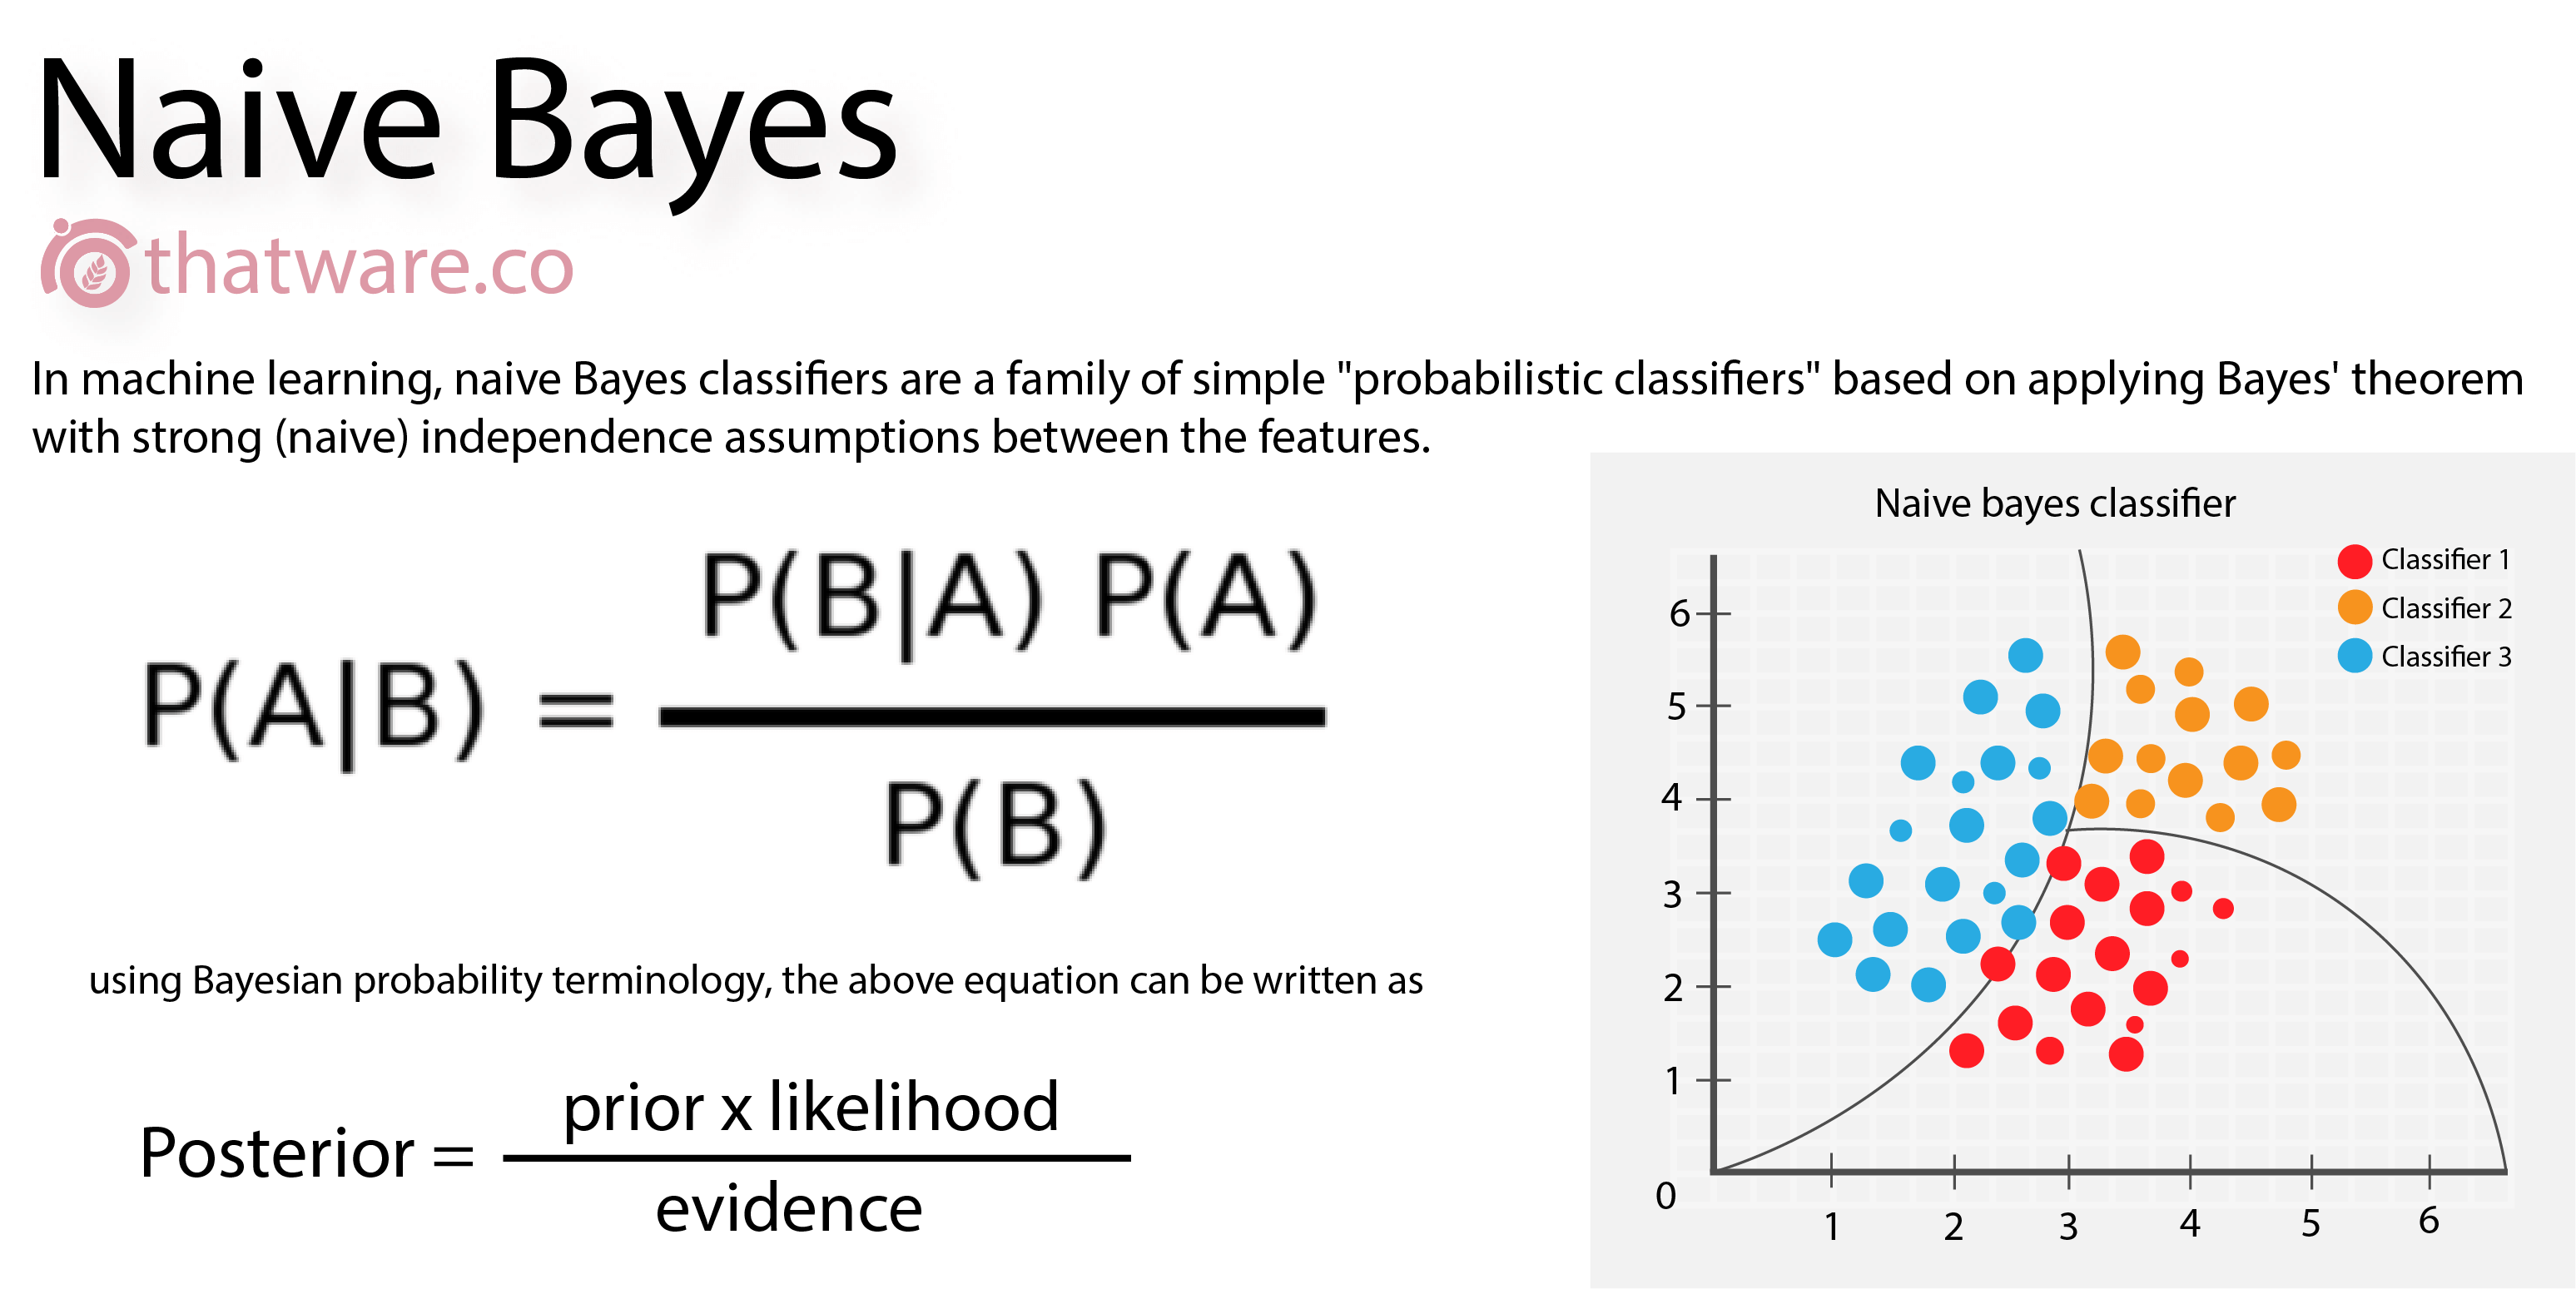
*   It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors.
*   In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
#3.Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_bow,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#prediction for naive bayes
prediction_nb=nb.predict(x_test_bow)
prediction_nb

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,prediction_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,prediction_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,prediction_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[849 108]
 [ 27 131]]
The accuracy score for the model is :  0.8789237668161435
The classification report for the model :
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       957
           1       0.55      0.83      0.66       158

    accuracy                           0.88      1115
   macro avg       0.76      0.86      0.79      1115
weighted avg       0.91      0.88      0.89      1115



##  **TF-IDF**
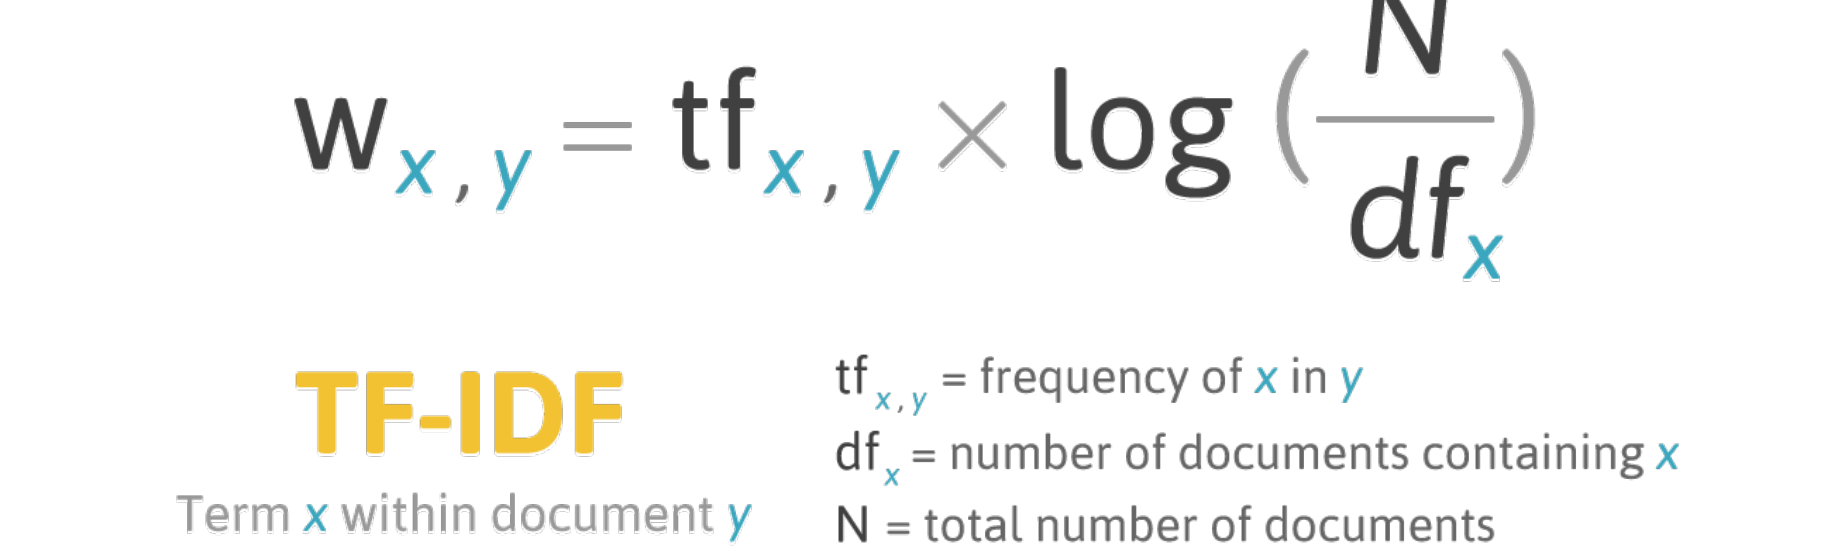
1. TF-IDF which stands for Term Frequency – Inverse Document Frequency.  
2. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document.
3. Implement using TfidfVectorizer from sklearn library.


In [ ]:
#Model development using TF-IDf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x_train_tf=tf.fit_transform(x_train.values.astype('U')).toarray()

In [ ]:
#1.Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(x_train_tf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#prediction for Multinomial Naive Bayes
x_test_tf=tf.transform(x_test).toarray()
prediction_mul_nb=mul_nb.predict(x_test_tf)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,prediction_mul_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,prediction_mul_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,prediction_mul_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[957   0]
 [ 40 118]]
The accuracy score for the model is :  0.9641255605381166
The classification report for the model :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.75      0.86       158

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.96      0.96      1115



In [ ]:
#2.Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,criterion='gini')
rf.fit(x_train_tf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction for randomforest
rf_prediction=rf.predict(x_test_tf)
rf_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,rf_prediction)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,rf_prediction)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,rf_prediction)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[957   0]
 [ 37 121]]
The accuracy score for the model is :  0.9668161434977578
The classification report for the model :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.77      0.87       158

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
#3.Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_tf,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#prediction for naive bayes
prediction_nb=nb.predict(x_test_tf)
prediction_nb

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,prediction_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,prediction_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,prediction_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[850 107]
 [ 33 125]]
The accuracy score for the model is :  0.874439461883408
The classification report for the model :
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       957
           1       0.54      0.79      0.64       158

    accuracy                           0.87      1115
   macro avg       0.75      0.84      0.78      1115
weighted avg       0.90      0.87      0.88      1115



1. The accuracy score of Multinomial Naive Bayes  using Bag Of Words is pretty much higher compared to all other models.
2. So I select Multinomial Naive Bayes model for this Project
3. Accuracy Score : 0.9739910313901345

Click the below link to get into testing a model using user input page.
[User input page](https://colab.research.google.com/drive/1tCPAye5TQJJvZRW5eSb8GTxvhnm6nYlR?usp=sharing)
